<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




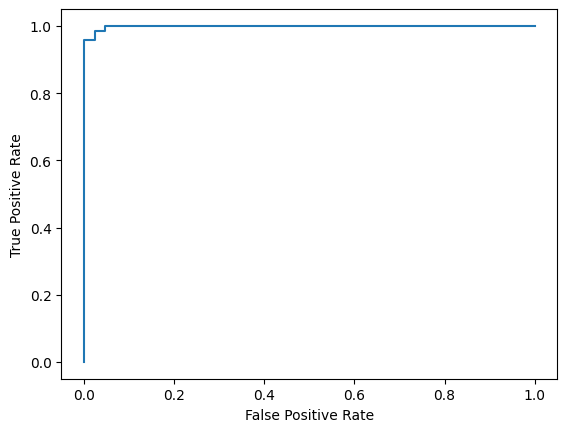

Optimal threshold: 0.6876378275115457


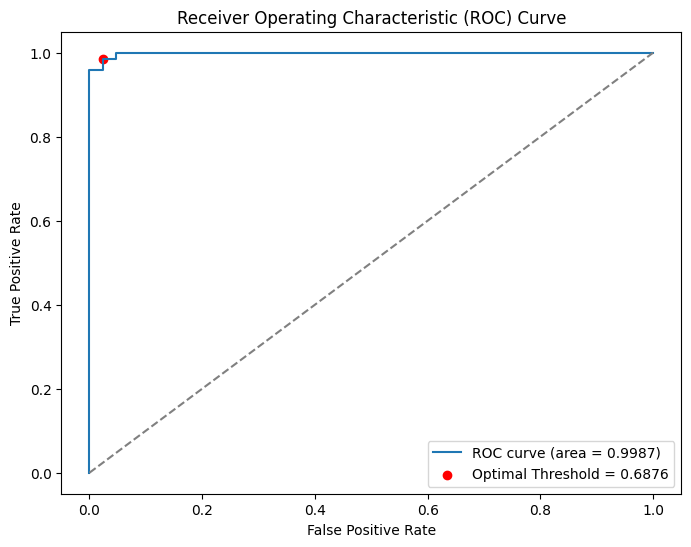

Accuracy: 0.9473684210526315
Precision: 0.9861111111111112
Recall: 0.9342105263157895
F1-Score: 0.9594594594594594
Specificity: 0.9736842105263158


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, accuracy_score, confusion_matrix


# loading dataset from sklearn
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# target == 0 represents malignant cancer, target == 1 represents benign cancer
df['target'] = data.target

# splitting dataset into predictors and response variable
X = df.drop(columns=['target'])
y = df['target']

# splitting dataset into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# training logistic regression model
logmodel = LogisticRegression(max_iter=200000)
logmodel.fit(X_train, y_train)

# probabilities for class 1
logistic_preds = logmodel.predict_proba(X)[:, 1]

# predicting classes (0 or 1) for observations
predicted_classes_logistic = logmodel.predict(X)

# getting vector with predictions only for validation set
y_val_preds = logmodel.predict_proba(X_val)[:, 1]

# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_preds)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# calculating AUC
roc_auc = auc(fpr, tpr)

# one option to determine optimal threshold is to find threshold that maximizes (tpr-fpr)
max_diff_tpr_fpr = np.argmax(tpr - fpr)
optimal_threshold = thresholds[max_diff_tpr_fpr]

print('Optimal threshold:', optimal_threshold)

# plotting ROC curve again, now with optimal threshold displayed
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.scatter(fpr[max_diff_tpr_fpr], tpr[max_diff_tpr_fpr], color='red', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# predicting classes (0 or 1) for test set
y_test_preds = logmodel.predict_proba(X_test)[:, 1]

# predicting classes (0 or 1) for test set using optimal threshold
y_test_preds2 = (y_test_preds >= optimal_threshold)
y_test_preds2 = y_test_preds2.astype(int)


## evaluating final model performance using metrics:

# accuracy
accuracy = accuracy_score(y_test, y_test_preds2)

# precision & recall, f1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_preds2, average='binary')

# sensitivity & specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_test_preds2).ravel()
specificity = tn / (tn+fp)



print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)
print('Specificity:', specificity)

## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

    Tak, inna granica może dawać lepsze rezultaty (tylko najpierw należy zdefiniować, co oznaczają "lepsze rezultaty"). Dla powyższeo algorytmu optymalna granica wyniosła około 0,69, zamiast standardowego 0,5. Warto pamiętać, że wybraliśmy optymalną granicę na podstawie maksymalizacji różnicy *(tpr - fpr)*, tzn. *(True Positive Ratio - False Positive Ratio)*.

    Zmiana granicy wpływa na wskaźniki *sensivity* oraz *specifity*/*recall* w następujący sposób: podwyższenie granicy powoduje wzrost *specifity* oraz spadek *sensivity*; obniżenie granicy na odrót - powoduje spadek *specifity* oraz wzrost *sensivity*.
    W naszym przypadku podwyższyliśmy granicę, zatem możemy oczekiwać wzrostu *specifity* oraz spadku *sensivity*.


2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?

    Warto w tym miejscu podać definicję tych wskaźników. *Sensivity* określa jak dobrze model wykrywa rzeczywiste pozytywne przypadki (pozytywny przypadek to taki, dla którego wartość to 1, a negatywny to taki, dla którego wartość to 0), tzn. *sensivity* to odsetek rzeczywistych pozytywnych przypadków, które zklasyfikowano jako pozytywne:

    *Sensivity* = True Positive/(True Positive + False Negative)

    Natomiast, *specifity* określa jak dobrze model wykrywa negatywne rzeczywiste przypadki:

    *Specifity* = True Negative/(True Negative + False Positive)

    Istotność *specificity* i *sensivity* zależy w dużej mierze od kontekstu analizowanych danych. Dla jednych zagadnień będziemy preferować wyższą wyższą *specifity* (w zagadnieniach, gdzie błędne zklasyfikowanie obserwacji jako pozytywny przypadek ma większe negatywne konsekwencje), a w innych wyższe *sensivity* (w kontekstach, gdzie pominięcie błędne zklasyfikowanie obserwacji jako negatywny przypadek jest niebezpieczne).
    
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.


